In [1]:
# pandas
import pandas as pd

# nltk for tokenization
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize

# spacy for entity rec
import spacy

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
'''
Read in .txts/.csvs of tagged sample data as a Pandas data frame
Add appropriate header to the columns as well.
'''
def read_as_df(buckets_filename, claim_id_filename, passage_filename):
    claim_ids = pd.read_csv(claim_id_filename, sep="\n")
    buckets = pd.read_csv(buckets_filename, sep="\n")
    passages = pd.read_csv(passage_filename, sep="\n")
    df_col_merged = pd.concat([claim_ids, buckets, passages], axis=1)

    return df_col_merged

In [4]:
merged = read_as_df('data/relic_prev_buckets.txt', 'data/relic_prev_ids.csv', 'data/relic_prev_passages.txt')

In [5]:
merged.head()

,claim_id,bucket,passage
0,13861,metaphor,The work of one moment was destroyed by the next.
1,55809,metaphor,How should they learn the entry into the finer...
2,3193,x,What is the meaning of life?
3,18123,internal character experience,His mind pictured the soldiers who would place...
4,18448,embellishing an event,He yelled then with fright and swung about. Fo...


In [6]:
def get_word_count(passage):
    return len(word_tokenize(passage))

In [7]:
def get_sentence_count(passage):
    return len(sent_tokenize(passage))

In [8]:
def get_entity_count(passage):
    doc = nlp(passage)
    return len(doc.ents)

In [9]:
def detect_first_person_passage(passage):
    passage_words = word_tokenize(passage)
    return "I" in passage_words or "me" in passage_words or "my" in passage_words or "we" in passage_words or "our" in passage_words

In [10]:
# tally word count for each passage
merged['word_count'] = merged.apply(lambda x: get_word_count(x.passage), axis=1)

In [11]:
# tally sentence count for each passage
merged['sentence_count'] = merged.apply(lambda x: get_sentence_count(x.passage), axis=1)

In [12]:
# tally named entity count for each passage
merged['named_entity_count'] = merged.apply(lambda x: get_entity_count(x.passage), axis=1)

In [13]:
# first person flag for each passage
merged['first_person'] = merged.apply(lambda x: detect_first_person_passage(x.passage), axis=1)

In [14]:
merged.head()

,claim_id,bucket,passage,word_count,sentence_count,named_entity_count,first_person
0,13861,metaphor,The work of one moment was destroyed by the next.,11,1,1,False
1,55809,metaphor,How should they learn the entry into the finer...,16,1,0,False
2,3193,x,What is the meaning of life?,7,1,0,False
3,18123,internal character experience,His mind pictured the soldiers who would place...,40,1,0,False
4,18448,embellishing an event,He yelled then with fright and swung about. Fo...,32,3,0,False


In [15]:
# word count per group
merged.groupby(['bucket'])['word_count'].median()

bucket
embellishing an event            40.5
external characterization        45.5
informative detail               44.0
internal character experience    42.0
metaphor                         40.0
sensory detail                   57.0
x                                34.0
Name: word_count, dtype: float64

In [16]:
# 5th percentile
merged['word_count'].quantile(0.05)

13.0

In [17]:
# 95th percentile
merged['word_count'].quantile(0.95)

114.15000000000009

In [18]:
# entity count per group
merged.groupby(['bucket'])['named_entity_count'].mean()

bucket
embellishing an event            0.907514
external characterization        0.916244
informative detail               1.366397
internal character experience    0.596154
metaphor                         0.828767
sensory detail                   0.976109
x                                0.836991
Name: named_entity_count, dtype: float64

In [17]:
#fpov
to_check = ['informative detail']
fp_df = merged[(merged['first_person'] == True) & (merged['bucket'].isin(to_check))]

In [18]:
fp_df.groupby(['bucket'])['first_person'].sum()

bucket
informative detail    141
Name: first_person, dtype: int64

<AxesSubplot:>

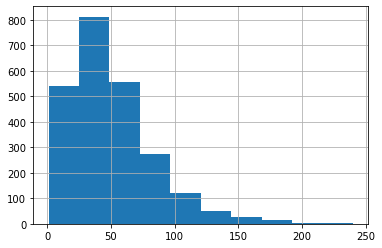

In [19]:
merged['word_count'].hist()

<AxesSubplot:>

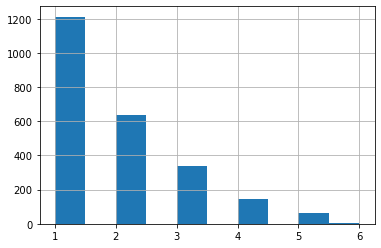

In [20]:
merged['sentence_count'].hist()

In [21]:
# sentence count per group
merged.groupby(['bucket'])['sentence_count'].mean()

bucket
embellishing an event            1.907514
external characterization        1.862944
informative detail               1.813765
internal character experience    1.853846
metaphor                         1.640411
sensory detail                   1.914676
x                                1.865204
Name: sentence_count, dtype: float64

In [25]:
merged.sort_values(by=['word_count'], ascending=False).head(30)[['passage', 'word_count']]

,passage,word_count
1281,"Natásha's illness was so serious that, fortuna...",240
376,then you saw a lifeboat full of children with ...,239
914,In the hardest working part of Coketown; in th...,207
2230,I was so conscious of having passed through sc...,201
1559,It may be that he pursues her doggedly and ste...,191
2222,"in a word, seen always at the same evening hou...",190
768,"it passed thus close by me, in action, so to s...",190
1639,"Then the active and intelligent, who has got i...",189
1855,She would have liked me to have in my room pho...,189
2200,"In fact, Mr. Crummles, who could never lose an...",188


In [26]:
list(merged[merged['word_count'] < 13.0]['passage'])

['The work of one moment was destroyed by the next.',
 'What is the meaning of life?',
 'Carrie realised the change of affectional atmosphere at once.',
 'I am tied down with single words.',
 'A display!',
 'but spectral, not really existing.',
 'WHY should human equality be averted?',
 "It wasn't a scene for a shudder;",
 'A bird twittered; two birds, three.',
 'x',
 'The verdict of human nature on such a wretch was death.',
 'She possessed eyes whose gaze I delighted to encounter.',
 'It most froze me to hear such talk.',
 'All men live enveloped in whale-lines.',
 'I opened the glass-door in the breakfast-room:',
 'Winston stopped writing, partly because he was suffering from cramp.',
 'Sailors loiter on the parade, and amorous couples;',
 'She had thought him just the bright reflex of herself.',
 'Would they but love her, she should be satisfied.',
 'All here is false; all is meretricious.',
 'he is a tyrant; he wears Mrs. Ramsay to death;',
 "it's Cana of Galilee, the first miracl

In [27]:
len(list(merged[merged['word_count'] > 112]['claim_id']))

126

In [28]:
# write out fpov .csv
fp_df.sort_values(by=['bucket'], ascending=True)[['claim_id', 'bucket', 'passage']].to_csv('data/first_person_id_passages.csv', index=False)